In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import json
import quandl
from pathlib import Path
from datetime import datetime

from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [2]:
import panel as pn
pn.extension('plotly')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [3]:
from urllib.request import urlopen
import yfinance as yf

In [4]:
quandl.ApiConfig.api_key = os.environ['QUANDL_API_KEY']

In [5]:
# Pull Kraken BTC price exchange data with desired date range, and return it as a DF
kraken_btc_df = quandl.get('BCHARTS/KRAKENUSD', start_date='2019-01-01', end_date='2021-07-31', returns='DataFrame')
kraken_btc_df

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2019-01-01,3690.9,4499.3,3643.7,3820.1,5422.737692,2.053113e+07,3786.119798
2019-01-02,3825.0,3920.0,3767.2,3886.2,5737.248428,2.205424e+07,3844.045380
2019-01-03,3887.8,3895.5,3721.9,3786.5,5533.988728,2.115354e+07,3822.476548
2019-01-04,3785.3,3856.9,3728.8,3823.7,5078.832023,1.923637e+07,3787.557313
2019-01-05,3823.6,3874.7,3772.1,3796.6,3545.082095,1.359609e+07,3835.198311
...,...,...,...,...,...,...,...
2021-06-16,40167.3,40493.0,38120.0,38337.1,6487.206888,2.539206e+08,39141.737747
2021-06-17,38337.1,39561.4,37405.0,38078.2,6003.220618,2.307246e+08,38433.468618
2021-06-18,38078.2,38193.1,35126.0,35824.0,6558.468890,2.409217e+08,36734.445103


In [6]:
#Making a df with only Dates and Closing Prices
kraken_btc_close = kraken_btc_df.drop(columns=['Open', 'High', 'Low', 'Volume (BTC)', 'Volume (Currency)', 'Weighted Price'])     
kraken_btc_close.head()

,Close
Date,
2019-01-01,3820.1
2019-01-02,3886.2
2019-01-03,3786.5
2019-01-04,3823.7
2019-01-05,3796.6


In [7]:
#Making another DF with Weighted Prices for later comparisons
kraken_btc_wprice = kraken_btc_df.drop(columns=['Open','Close', 'High', 'Low', 'Volume (BTC)', 'Volume (Currency)'])
kraken_btc_wprice.head()

,Weighted Price
Date,
2019-01-01,3786.119798
2019-01-02,3844.045380
2019-01-03,3822.476548
2019-01-04,3787.557313
2019-01-05,3835.198311


In [8]:
#Create a DF to with the BTC and USD volumes, also for possible later comparison
kraken_btc_usd_volume =  kraken_btc_df.drop(columns=['Open', 'High','Close', 'Low', 'Weighted Price'])
kraken_btc_usd_volume.head()

,Volume (BTC),Volume (Currency)
Date,,
2019-01-01,5422.737692,2.053113e+07
2019-01-02,5737.248428,2.205424e+07
2019-01-03,5533.988728,2.115354e+07
2019-01-04,5078.832023,1.923637e+07
2019-01-05,3545.082095,1.359609e+07


In [18]:
#Run pct_change BTC price df's to get return dfs
btc_close_returns = kraken_btc_close.pct_change()
btc_weighted_returns= kraken_btc_wprice.pct_change()
btc_close_returns.dropna(inplace=True)
btc_weighted_returns.dropna(inplace=True)
btc_close_returns.head()

,Close
Date,
2019-01-02,0.017303
2019-01-03,-0.025655
2019-01-04,0.009824
2019-01-05,-0.007087
2019-01-06,0.064400


In [10]:
btc_weighted_returns.head()

,Weighted Price
Date,
2019-01-01,NaN
2019-01-02,0.015299
2019-01-03,-0.005611
2019-01-04,-0.009135
2019-01-05,0.012578


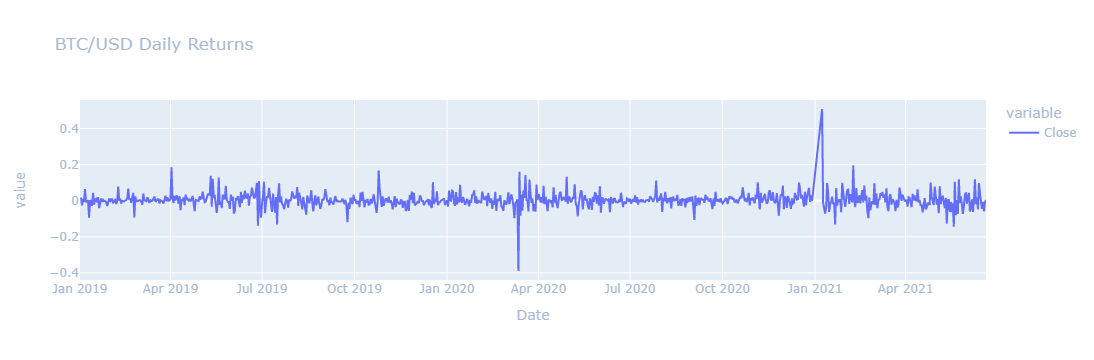

In [11]:
#Plotting Daily Returns from Close prices
btc_close_returns_fig = px.line(btc_close_returns,title = 'BTC/USD Daily Returns')
btc_close_returns_fig.show()

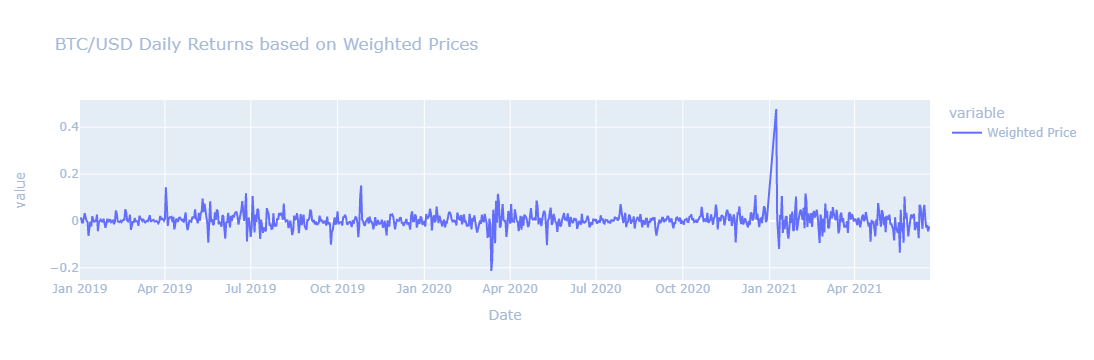

In [12]:
#Plotting Daily returns from Weighted Prices
btc_weighted_returns_fig = px.line(btc_weighted_returns, title = 'BTC/USD Daily Returns based on Weighted Prices' )
btc_weighted_returns_fig.show()

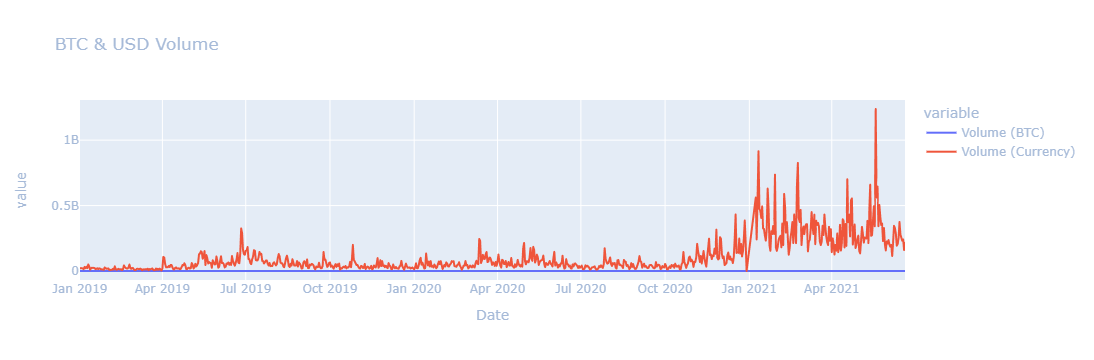

In [13]:
#Comparison of BTC Volume to USD Volume
btc_usd_vol_fig = px.line(kraken_btc_usd_volume,title = 'BTC & USD Volume')
btc_usd_vol_fig.show()

In [14]:
#Fetching Data for SPY, Gold, Nasdaq 100, amazon, visa, and tesla for our set timeframe
eq_daily_data = yf.download("SPY GLD QQQ AMZN V TSLA", start="2019-01-01", end="2021-07-31")
eq_daily_data.dtypes

[*********************100%***********************]  6 of 6 completed


Adj Close  AMZN    float64
           GLD     float64
           QQQ     float64
           SPY     float64
           TSLA    float64
           V       float64
Close      AMZN    float64
           GLD     float64
           QQQ     float64
           SPY     float64
           TSLA    float64
           V       float64
High       AMZN    float64
           GLD     float64
           QQQ     float64
           SPY     float64
           TSLA    float64
           V       float64
Low        AMZN    float64
           GLD     float64
           QQQ     float64
           SPY     float64
           TSLA    float64
           V       float64
Open       AMZN    float64
           GLD     float64
           QQQ     float64
           SPY     float64
           TSLA    float64
           V       float64
Volume     AMZN      int64
           GLD       int64
           QQQ       int64
           SPY       int64
           TSLA      int64
           V         int64
dtype: object

In [15]:
#Dropping everything but the Close columns and open columns to run returns analysis

equity_close = eq_daily_data.drop(columns=['Adj Close', 'High', 'Low', 'Open', 'Volume'])
equity_close

Close                                                  \
                   AMZN         GLD         QQQ         SPY        TSLA   
Date                                                                      
2019-01-02  1539.130005  121.330002  154.880005  250.179993   62.023998   
2019-01-03  1500.280029  122.430000  149.820007  244.210007   60.071999   
2019-01-04  1575.390015  121.440002  156.229996  252.389999   63.537998   
2019-01-07  1629.510010  121.860001  158.089996  254.380005   66.991997   
2019-01-08  1656.579956  121.529999  159.520004  256.769989   67.070000   
...                 ...         ...         ...         ...         ...   
2021-07-26  3699.820068  168.160004  368.489990  441.019989  657.619995   
2021-07-27  3626.389893  168.440002  364.429993  439.010010  644.780029   
2021-07-28  3630.320068  169.289993  365.829987  438.829987  646.979980   
2021-07-29  3599.919922  171.169998  366.480011  440.649994  677.349976   
2021-07-30  3327.590088  169.820007  364.570007  438.510010  687.200012   

                        
                     V  
Date                    
2019-01-02  132.919998  
2019-01-03  128.130005  
2019-01-04  133.649994  
2019-01-07  136.059998  
2019-01-08  136.800003  
...                ...  
2021-07-26  250.250000  
2021-07-27  250.929993  
2021-07-28  246.940002  
2021-07-29  247.919998  
2021-07-30  246.389999  

[650 rows x 6 columns]

In [16]:
equity_close.dropna(inplace=True)
equity_close

Close                                                  \
                   AMZN         GLD         QQQ         SPY        TSLA   
Date                                                                      
2019-01-02  1539.130005  121.330002  154.880005  250.179993   62.023998   
2019-01-03  1500.280029  122.430000  149.820007  244.210007   60.071999   
2019-01-04  1575.390015  121.440002  156.229996  252.389999   63.537998   
2019-01-07  1629.510010  121.860001  158.089996  254.380005   66.991997   
2019-01-08  1656.579956  121.529999  159.520004  256.769989   67.070000   
...                 ...         ...         ...         ...         ...   
2021-07-26  3699.820068  168.160004  368.489990  441.019989  657.619995   
2021-07-27  3626.389893  168.440002  364.429993  439.010010  644.780029   
2021-07-28  3630.320068  169.289993  365.829987  438.829987  646.979980   
2021-07-29  3599.919922  171.169998  366.480011  440.649994  677.349976   
2021-07-30  3327.590088  169.820007  364.570007  438.510010  687.200012   

                        
                     V  
Date                    
2019-01-02  132.919998  
2019-01-03  128.130005  
2019-01-04  133.649994  
2019-01-07  136.059998  
2019-01-08  136.800003  
...                ...  
2021-07-26  250.250000  
2021-07-27  250.929993  
2021-07-28  246.940002  
2021-07-29  247.919998  
2021-07-30  246.389999  

[650 rows x 6 columns]

In [23]:
equity_close.join(kraken_btc_close)
equity_close.head()

C:\Users\n1ck_\anaconda3\envs\crypto-anal\lib\site-packages\pandas\core\frame.py:9126: FutureWarning:

merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)



Close                                                 \
                   AMZN         GLD         QQQ         SPY       TSLA   
Date                                                                     
2019-01-02  1539.130005  121.330002  154.880005  250.179993  62.023998   
2019-01-03  1500.280029  122.430000  149.820007  244.210007  60.071999   
2019-01-04  1575.390015  121.440002  156.229996  252.389999  63.537998   
2019-01-07  1629.510010  121.860001  158.089996  254.380005  66.991997   
2019-01-08  1656.579956  121.529999  159.520004  256.769989  67.070000   

                        
                     V  
Date                    
2019-01-02  132.919998  
2019-01-03  128.130005  
2019-01-04  133.649994  
2019-01-07  136.059998  
2019-01-08  136.800003

In [17]:
#Calculating %change to get returns 
equity_returns =  
equity_returns


KeyError: 'Open'

In [ ]:
#Calculating Correlation for equity
correlation = equity_returns.corr()
correlation